In [74]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk import word_tokenize
import spacy
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
data = pd.read_csv("/content/drive/MyDrive/Combined Data.csv")
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [104]:
data.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [106]:
data=data[['statement','status']]

In [107]:
data.isnull().sum()

,0
statement,362
status,0


In [108]:
data= data.dropna()
print(data)

                                               statement   status
0                                             oh my gosh  Anxiety
1      trouble sleeping, confused mind, restless hear...  Anxiety
2      All wrong, back off dear, forward doubt. Stay ...  Anxiety
3      I've shifted my focus to something else but I'...  Anxiety
4      I'm restless and restless, it's been a month n...  Anxiety
...                                                  ...      ...
53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040  Is there any way to sleep better? I can't slee...  Anxiety
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042  I have really bad door anxiety! It's not about...  Anxiety

[52681 rows x 2 columns]


In [109]:
data.isnull().sum()

,0
statement,0
status,0


In [110]:
data['statement'] = data['statement'].str.lower()

In [111]:
data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"all wrong, back off dear, forward doubt. stay ...",Anxiety
3,i've shifted my focus to something else but i'...,Anxiety
4,"i'm restless and restless, it's been a month n...",Anxiety


In [112]:
data['statement'].duplicated().sum()

np.int64(1632)

In [113]:
data = data.drop_duplicates(subset=['statement'])

In [114]:
data.duplicated().sum()

np.int64(0)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51049 entries, 0 to 52840
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51049 non-null  object
 1   status     51049 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [116]:
def sequence_len(data, column):
    max_len, min_len= 0, float('inf')
    total_len= 0

    for text in data[column].tolist():
        length= len(str(text).split())
        total_len+=length
        min_len= min(min_len, length)
        max_len= max(max_len, length)

    avg_len= round(total_len/ len(data))
    print(f'The longest {column} has {max_len} words,The shortest {column} has {min_len} words ,average {column} has {avg_len} words')

In [117]:
sequence_len(data, 'statement')

The longest statement has 6300 words,The shortest statement has 1 words ,average statement has 113 words


In [118]:
data = data.copy()

In [119]:
def text_preprocessing(data):
  data= re.sub(r'\d+',' ', data)
  data= data.translate(str.maketrans('','', string.punctuation))
  data= re.sub(r'[^\x00-\x7F]+', '', data)
  data= re.sub(r'(.)\1{2,}', r'\1\1', data)
  data= re.sub(r'\s+', ' ', data).strip()
  return data

In [120]:
data['statement'] = data['statement'].apply(lambda x: text_preprocessing(" ".join(x)) if isinstance(x, list) else text_preprocessing(x))

In [121]:
data.head()

,statement,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,ive shifted my focus to something else but im ...,Anxiety
4,im restless and restless its been a month now ...,Anxiety


In [122]:
if data['statement'].apply(lambda x: isinstance(x, str)).all():
  data['statement']=data['statement'].apply(word_tokenize)
else:
  print("Skip tokenization as statement is already tokenized")

In [123]:
data['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [124]:
data['status'].value_counts()

,count
status,
Normal,16020
Depression,15086
Suicidal,10641
Anxiety,3613
Bipolar,2501
Stress,2293
Personality disorder,895


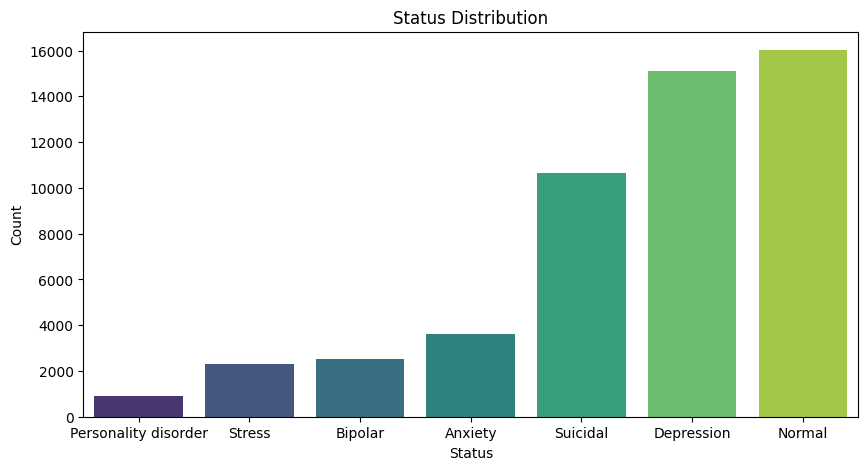

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
data = data.groupby('status')['statement'].count().sort_values().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(
    data=data,
    x='status',
    y='statement',
    hue='status',
    legend=False,
    palette='viridis'
)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Distribution')
plt.show()


In [ ]:
nlp = spacy.load("en_core_web_sm")
def lemmetization(tokens):
  data= " ".join(tokens)
  doc= nlp(data)
  return [token.lemma_ for token in doc]

In [ ]:
data['statement']= data['statement'].apply(lemmetization)

In [ ]:
data.head()

,statement,status
0,"[oh, my, gosh]",Anxiety
1,"[trouble, sleep, confused, mind, restless, hea...",Anxiety
2,"[all, wrong, back, off, dear, forward, doubt, ...",Anxiety
3,"[I, ve, shift, my, focus, to, something, else,...",Anxiety
4,"[I, m, restless, and, restless, its, be, a, mo...",Anxiety


In [ ]:
data.to_csv('Final_dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download("Final_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>